In [6]:
import pandas as pd
import numpy as np
import gensim
from gensim import utils
from gensim import utils
from gensim.models.doc2vec import LabeledSentence
from gensim.models import Doc2Vec
from gensim import models,utils
from gensim import corpora
from gensim.corpora import Dictionary
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv(r"C:\Users\Yunmeng\Downloads\LDA_TF.csv")

FileNotFoundError: File b'C:\\Users\\Yunmeng\\Downloads\\LDA_TF.csv' does not exist

In [2]:
contents = df["tfWords"]

NameError: name 'df' is not defined

In [ ]:
tags = range(len(contents))

In [8]:
def read_corpus(tokens_only=False):
    for tag, content in zip(tags,contents):
            if tokens_only:
                yield utils.simple_preprocess(line)
            else:
                # For training data, add tags
                yield models.doc2vec.TaggedDocument(utils.simple_preprocess(str(content)), str(tag))

In [4]:
train_corpus = list(read_corpus(tokens_only=False))
model = Doc2Vec(vector_size=30, min_count=2, epochs=55)
model.build_vocab(train_corpus)
train_corpus[0]

NameError: name 'tags' is not defined

In [7]:
%time model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)

Wall time: 48.7 s


In [8]:
infer_vecs=[]
for i in train_corpus:
    infer_vecs.append(model.infer_vector(i[0]))

In [9]:
infer_vecs = [i.astype("float64") for i in infer_vecs]
doc2vecs = pd.DataFrame(infer_vecs)

In [10]:
x = doc2vecs.copy()

In [11]:
from sklearn.decomposition import PCA
from sklearn.manifold import SpectralEmbedding,LocallyLinearEmbedding
from sklearn.neural_network import BernoulliRBM

In [12]:
bx = BernoulliRBM(n_components=2).fit_transform(x)

In [22]:
lle = LocallyLinearEmbedding()

In [23]:
lx = lle.fit_transform(x)

In [13]:
px=PCA().fit_transform(x)

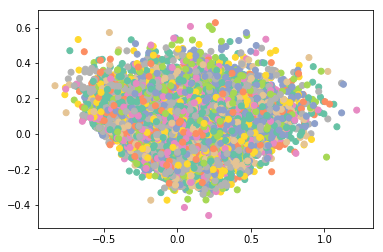

In [14]:
plt.scatter(px[:,0],px[:,1],c=df["Topic"],cmap="Set2")

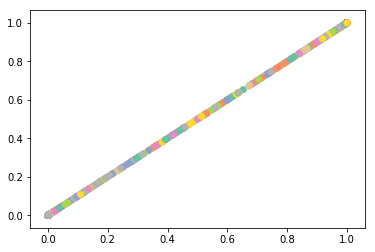

In [15]:
plt.scatter(bx[:,0],bx[:,1],c=df["Topic"],cmap="Set2")